# Advanced Statistics

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

## Point estimates

In [2]:
np.random.seed(1234)

long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000) # represents 3000 people who take about a 60 minute break
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000) # represents 6000 people who take about a 15 minute break

# put the two arrays together to get our "population" of 9000 people
breaks = np.concatenate((long_breaks, short_breaks)) 
breaks.mean()

39.99944444444444

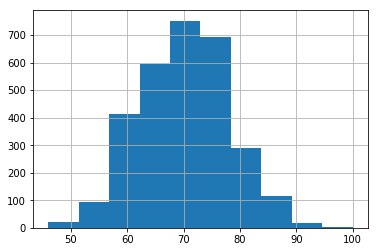

In [3]:
pd.Series(long_breaks).hist()

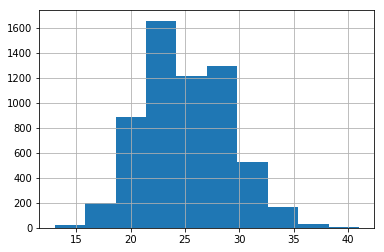

In [4]:
pd.Series(short_breaks).hist()

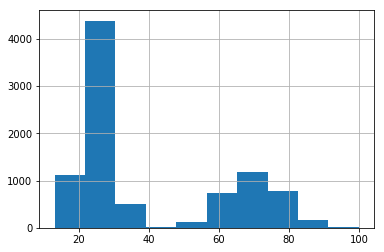

In [5]:
pd.Series(breaks).hist()

In [6]:
# taking a sample of 100 employees
sample_breaks = np.random.choice(a = breaks, size=100)

In [7]:
breaks.mean() - sample_breaks.mean()   
# difference between means

0.6994444444444454

In [8]:
employee_races = (["white"]*2000) + (["black"]*1000) +\
                   (["hispanic"]*1000) + (["asian"]*3000) +\
                   (["other"]*3000)

demo_sample = random.sample(employee_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000. )
    

asian proportion estimate:
0.305
hispanic proportion estimate:
0.107
black proportion estimate:
0.099
white proportion estimate:
0.194
other proportion estimate:
0.295


## Sampling distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cdfec88>]],
      dtype=object)

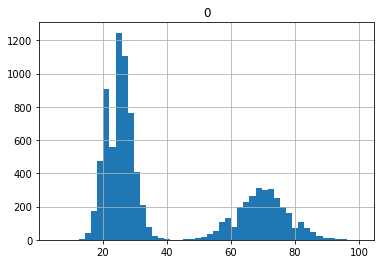

In [9]:
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cdfe9e8>]],
      dtype=object)

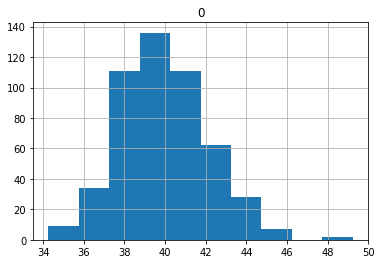

In [10]:
point_estimates = []
for x in range(500):         # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100) #take a sample of 100 points
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).hist()

In [11]:
breaks.mean() - np.array(point_estimates).mean()

0.04232444444443928

## Confidence intervals

In [12]:
sample_size = 100
sample = np.random.choice(a= breaks, size = sample_size)

sample_mean = sample.mean()
# sample mean

sample_stdev = sample.std()    
# sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  
# population Standard deviation estimate

stats.t.interval(alpha = 0.95,              # Confidence level
                 df= sample_size - 1,       # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(36.29263468910625, 45.26736531089375)

In [13]:
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)

    sample_mean = sample.mean()
    # sample mean

    sample_stdev = sample.std()    
    # sample standard deviation

    sigma = sample_stdev/math.sqrt(sample_size)  
    # population Standard deviation estimate

    return stats.t.interval(alpha = 0.95,              # Confidence level
                     df= sample_size - 1,       # Degrees of freedom
                     loc = sample_mean,         # Sample mean
                     scale = sigma)             # Standard deviation estimate

In [14]:
times_in_interval = 0.
for i in range(10000):
    interval = makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
    # if 39.99 falls in the interval
        times_in_interval += 1

print(times_in_interval / 10000)
    

0.9472


In [15]:
for confidence in (.5, .8, .85, .9, .95, .99):
    confidence_interval = stats.t.interval(alpha = confidence, df= sample_size - 1, loc = sample_mean, scale = sigma)   
                    
    length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2) # the length of the confidence interval
    
    print("confidence {0} has a interval of size {1}".format(confidence, length_of_interval))


confidence 0.5 has a interval of size 3.06
confidence 0.8 has a interval of size 5.84
confidence 0.85 has a interval of size 6.56
confidence 0.9 has a interval of size 7.51
confidence 0.95 has a interval of size 8.97
confidence 0.99 has a interval of size 11.88


## Hypothesis tests

### Conducting a hypotesis test

### One sample t-test

In [16]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)
engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))

print(breaks.mean())
print(engineering_breaks.mean())

39.99944444444444
35.44


In [17]:
t_statistic, p_value = stats.ttest_1samp(a= engineering_breaks,   # Sample data
                                         popmean= breaks.mean())  # Population mean

In [18]:
t_statistic, p_value

(-4.90084434978126, 1.3902828671063965e-06)

### Hypothesis test for categorical variables

Chi-square goodness of fit test

In [19]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]

In [20]:
chi_squared, p_value = stats.chisquare(f_obs= observed,   # Array of observed counts
                                       f_exp= expected)   # Array of expected counts
chi_squared, p_value

(30.1817679275599, 1.26374310311106e-06)

Chi-square test for association/independence

In [22]:
observed = np.array([[134, 54],[110, 48]])
chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed= observed)
chi_squared, p_value

(0.04762692369491045, 0.8272452870442226)